In [32]:
import pandas as pd

In [33]:

customers = pd.read_csv('../Data/Shashi_Kumar_Thakur_Customers.csv')
products = pd.read_csv('../Data/Shashi_Kumar_Thakur_Products.csv')
transactions = pd.read_csv('../Data/Shashi_Kumar_thakur_Transactions.csv')
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [34]:

data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(data.head())
print(data.columns)


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [35]:

data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',    
    'Quantity': 'sum',      
    'Price_x': 'mean'       
}).reset_index()


customer_features.rename(columns={'Price_x': 'AvgPrice'}, inplace=True)


print(customer_features.head())


  CustomerID  TotalValue  Quantity    AvgPrice
0      C0001     3354.52        12  278.334000
1      C0002     1862.74        10  208.920000
2      C0003     2725.38        14  195.707500
3      C0004     5354.88        23  240.636250
4      C0005     2034.24         7  291.603333


In [36]:

clustering_data = customer_features.iloc[:, 1:]


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_data)


db_index = davies_bouldin_score(clustering_data, clusters)
print("Davies-Bouldin Index:", db_index)


customer_features['Cluster'] = clusters


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.5901013754686039


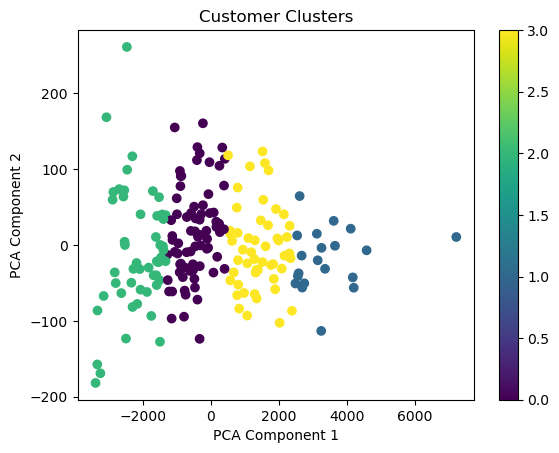

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
